Josías Parra

José P. De la Rosa

## Objetivo.

Implementar un modelo de clasificación facial basado en el uso de _Support Vector Machines_ mediante _sklearn_, utilizando como set de datos de Entrenamiento/Evaluación el conjunto de rostros _Olivetti_: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html 

## Antecedentes.

Este trabajo recupera la implementación de [1] de un modelo de reconocimiento facial, utilizada para  la clasificación del set de datos _Labeled Faces in the Wild_

## Set de datos.

El set de datos _Olivetti_ contiene un conjunto de imágenes faciales tomadas entre los años 1992-1994 en los laboratorios de AT&T Cambridge. 

Este conjunto consiste en una colección de 400 fotografías recuperadas de 40 participantes; 10 fotografías tomadas de manera frontal a cada sujeto, recopiladas con variaciones en el tiempo de captura,  luz, expresión facial y accesorios faciales. 

Este set puede ser recuperado por medio de la función sklearn.datasets.fetch_olivetti_faces en un formato de 64x64 pixeles. Como salida, esta función devuelve un objeto con los siguientes atributos:

<b>data </b>: Arreglo de Numpy de tamaño (400, 4096)
Cada fila corresponde a una imagen de cara delineada del tamaño original de 64 x 64 píxeles. 

<b>images</b>: Arreglo de Numpy de tamaño (400, 64, 64)
Cada fila es una imagen facial correspondiendo a uno de los 40 sujetos.

<b>target</b>: _numpy array_ de tamaño (400, )
Etiquetas asociadas a cada imagen. Estas se hallan en un rango de 0-39 y corresponden a los números de ID de los sujetos.

<b>DESCR</b>: string
Descripcion del set de datos. 

Ver más información de la función  sklearn.datasets.fetch_olivetti_faces en: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html#sklearn.datasets.fetch_olivetti_faces

In [1]:
from sklearn.datasets import fetch_olivetti_faces
#Recuperar dataset de Olivetti y asignar objeto de salida a caras
caras = fetch_olivetti_faces()
#Desplegar descipción de dataset y etiquetas de imágenes. 
print(caras.DESCR)
print(caras.target)

Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7


Algunas imágenes obtenidas pueden ser visualizadas por medio de la librería Seaborn.

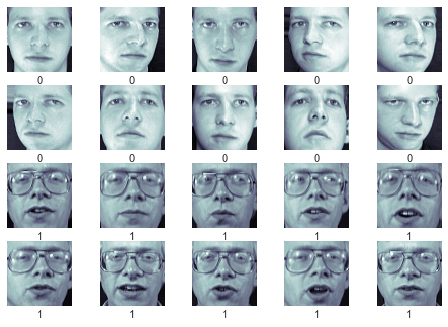

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pylab

# use seaborn plotting defaults
import seaborn as sns; sns.set()
fig, ax = plt.subplots(4, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(caras.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=caras.target[i])
plt.show()

## Modelo de SVM.

Este set de datos puede ser dividido en un conjunto de datos de entrenamiento y de evaluación por medio de la función sklearn.model_selection.train_test_split

In [3]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(caras.data, caras.target,
                                                random_state=42)

Se crea un modelo que utilizará un análisis de componentes principales (PCA) para extraer 150 características fundamentales de las imágenes.

In [4]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(svd_solver='randomized', n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

# Variaciones de parámetros de entrenamiento.

## Búsqueda de cuadrícula (Grid Search)

[1] recomienda usar una validación cruzada de búsqueda de cuadrículas (grid search) para explorar combinaciones de parámetros, y determinar el mejor modelo:

## 2-Fold cross validation

### Variación de parámetros C y gamma de SVM 

In [33]:
from sklearn.model_selection import GridSearchCV
#C controla rigidez de los márgenes. +
#Gamma controla el tamaño de base radial del kernel

param_grid = {'svc__C': [0.1,0.5,1,5,10,50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005,0.01,0.1]}
grid = GridSearchCV(model, param_grid,cv=2)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)


CPU times: user 59.3 s, sys: 3.81 s, total: 1min 3s
Wall time: 31.1 s
{'svc__C': 50, 'svc__gamma': 0.0001}


In [34]:
grid.cv_results_

{'mean_fit_time': array([0.23911405, 0.24834299, 0.22169042, 0.21896505, 0.22208154,
        0.22457039, 0.21741641, 0.22085106, 0.21889734, 0.22630787,
        0.21680641, 0.22265399, 0.22190952, 0.21462405, 0.22381282,
        0.2216109 , 0.22605789, 0.23850572, 0.2359066 , 0.25656903,
        0.24526644, 0.26279044, 0.34144998, 0.89564109, 0.86543298,
        1.03626287, 1.07484066, 0.72330391, 0.84394848, 0.87195647,
        0.65819538, 0.22151458, 0.23073208, 0.22709537, 0.22189343,
        0.21844065]),
 'mean_score_time': array([0.01421499, 0.01393342, 0.0136106 , 0.01371253, 0.01459157,
        0.01441693, 0.01423848, 0.01356375, 0.01414073, 0.01543367,
        0.01360941, 0.01359153, 0.01320648, 0.01450658, 0.01461601,
        0.01450956, 0.01602042, 0.01573265, 0.01575756, 0.01954734,
        0.01600659, 0.01540649, 0.01973951, 0.06547594, 0.05901253,
        0.06321967, 0.05765581, 0.0427866 , 0.05590403, 0.0605315 ,
        0.03649592, 0.01349795, 0.01390696, 0.01576555, 0.

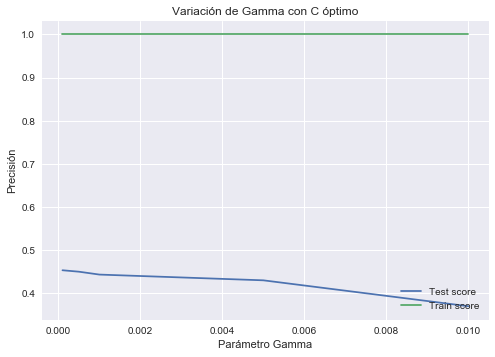

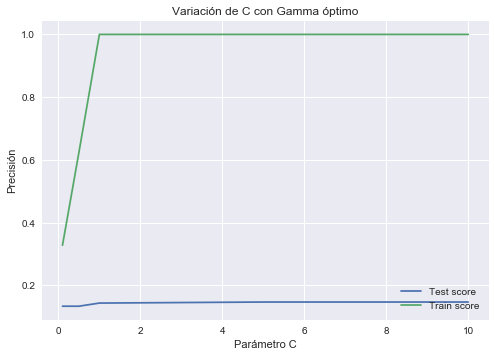

In [35]:
arr_gamma=grid.cv_results_['param_svc__gamma']
arr_C=grid.cv_results_['param_svc__C']

def get_best_index(ind,arr):
    w=[]
    l=list(arr)
    i=0
    try:
        C=l.index(ind)
        while (True):
            del(l[C])
            C=l.index(ind)
            w=np.append(C+i,w)
            i=i+1
    except:
        return(w)
def get_plot(ind,arr):
    w=[]
    for x in (ind):
        w=np.append(arr[int(x)],w)
    return(w)
    
iC=get_best_index(grid.best_params_['svc__C'],arr_C)
iGamma=get_best_index(grid.best_params_['svc__gamma'],arr_gamma)

#Graficar variaciones de C con Gamma estático
arr_C_variation_test=get_plot(iGamma,grid.cv_results_['mean_test_score'])
arr_C_variation_train=get_plot(iGamma,grid.cv_results_['mean_train_score'])
arr_C_variation_x=get_plot(iGamma,arr_C)

#Graficar variaciones de Gamma con C estático
arr_Gamma_variation_test=get_plot(iC,grid.cv_results_['mean_test_score'])
arr_Gamma_variation_train=get_plot(iC,grid.cv_results_['mean_train_score'])
arr_Gamma_variation_x=get_plot(iC,arr_gamma)

pylab.title('Variación de Gamma con C óptimo')
pylab.ylabel('Precisión')
pylab.xlabel('Parámetro Gamma')
pylab.plot(arr_Gamma_variation_x,arr_Gamma_variation_test,label='Test score')
pylab.plot(arr_Gamma_variation_x,arr_Gamma_variation_train,label='Train score')
pylab.legend(loc='lower right')
pylab.show()

pylab.title('Variación de C con Gamma óptimo')
pylab.ylabel('Precisión')
pylab.xlabel('Parámetro C')
pylab.plot(arr_C_variation_x,arr_C_variation_test, label='Test score')
pylab.plot(arr_C_variation_x,arr_C_variation_train, label='Train score')
pylab.legend(loc='lower right')
pylab.show()

## 3-Fold cross validation

In [38]:
from sklearn.model_selection import GridSearchCV
#C controla rigidez de los márgenes. +
#Gamma controla el tamaño de base radial del kernel

param_grid = {'svc__C': [0.1,0.5,1,5,10,50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005,0.01,0.1]}
grid = GridSearchCV(model, param_grid,cv=3)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)


CPU times: user 3min 34s, sys: 10.9 s, total: 3min 45s
Wall time: 1min 46s
{'svc__C': 5, 'svc__gamma': 0.001}


In [39]:
grid.cv_results_

{'mean_fit_time': array([0.96718804, 1.29900726, 1.27972738, 0.85990644, 0.83961312,
        0.83389807, 0.82301466, 0.82640537, 0.83232395, 0.82698353,
        0.84630807, 0.87371763, 0.84763686, 0.84815073, 0.83687655,
        0.84270406, 0.84807666, 0.82176264, 0.82778891, 0.82443698,
        0.85605407, 0.83695793, 0.82605521, 0.85844048, 0.82782984,
        0.84052976, 0.83803288, 0.83662097, 0.92668343, 1.35774835,
        1.1403056 , 0.87173605, 0.84030541, 0.60508823, 0.26058308,
        0.26183661]),
 'mean_score_time': array([0.04883091, 0.07096163, 0.0736467 , 0.04542534, 0.04485019,
        0.04393125, 0.04541643, 0.04506405, 0.04448708, 0.04647978,
        0.04562664, 0.04806773, 0.0483191 , 0.04632894, 0.04704674,
        0.04599007, 0.04636526, 0.04537193, 0.04517968, 0.0454456 ,
        0.04719869, 0.04875771, 0.04541938, 0.04625964, 0.04482436,
        0.04619567, 0.04630462, 0.04667576, 0.05584407, 0.0599641 ,
        0.04831227, 0.04950682, 0.04650164, 0.02519401, 0.

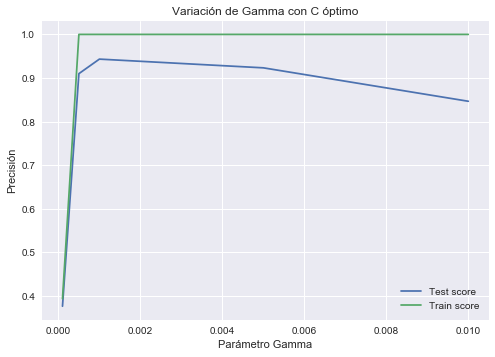

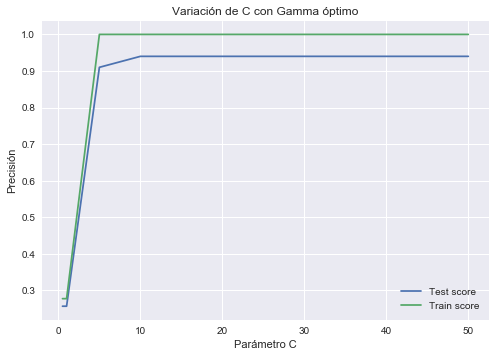

In [40]:
arr_gamma=grid.cv_results_['param_svc__gamma']
arr_C=grid.cv_results_['param_svc__C']

def get_best_index(ind,arr):
    w=[]
    l=list(arr)
    i=0
    try:
        C=l.index(ind)
        while (True):
            del(l[C])
            C=l.index(ind)
            w=np.append(C+i,w)
            i=i+1
    except:
        return(w)
def get_plot(ind,arr):
    w=[]
    for x in (ind):
        w=np.append(arr[int(x)],w)
    return(w)
    
iC=get_best_index(grid.best_params_['svc__C'],arr_C)
iGamma=get_best_index(grid.best_params_['svc__gamma'],arr_gamma)

#Graficar variaciones de C con Gamma estático
arr_C_variation_test=get_plot(iGamma,grid.cv_results_['mean_test_score'])
arr_C_variation_train=get_plot(iGamma,grid.cv_results_['mean_train_score'])
arr_C_variation_x=get_plot(iGamma,arr_C)

#Graficar variaciones de Gamma con C estático
arr_Gamma_variation_test=get_plot(iC,grid.cv_results_['mean_test_score'])
arr_Gamma_variation_train=get_plot(iC,grid.cv_results_['mean_train_score'])
arr_Gamma_variation_x=get_plot(iC,arr_gamma)

pylab.title('Variación de Gamma con C óptimo')
pylab.ylabel('Precisión')
pylab.xlabel('Parámetro Gamma')
pylab.plot(arr_Gamma_variation_x,arr_Gamma_variation_test,label='Test score')
pylab.plot(arr_Gamma_variation_x,arr_Gamma_variation_train,label='Train score')
pylab.legend(loc='lower right')
pylab.show()

pylab.title('Variación de C con Gamma óptimo')
pylab.ylabel('Precisión')
pylab.xlabel('Parámetro C')
pylab.plot(arr_C_variation_x,arr_C_variation_test, label='Test score')
pylab.plot(arr_C_variation_x,arr_C_variation_train, label='Train score')
pylab.legend(loc='lower right')
pylab.show()

## 4-Fold cross validation

In [44]:
from sklearn.model_selection import GridSearchCV
#C controla rigidez de los márgenes. +
#Gamma controla el tamaño de base radial del kernel

param_grid = {'svc__C': [0.1,0.5,1,5,10,50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005,0.01,0.1]}
grid = GridSearchCV(model, param_grid,cv=4)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)


/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


CPU times: user 2min 1s, sys: 6.43 s, total: 2min 7s
Wall time: 54.3 s
{'svc__C': 5, 'svc__gamma': 0.0005}


In [24]:
grid.cv_results_

{'mean_fit_time': array([0.32780099, 0.33997267, 0.30795979, 0.30355924, 0.3027938 ,
        0.31136811, 0.29438806, 0.3113299 , 0.31086528, 0.30764592,
        0.30810428, 0.29121512, 0.29594731, 0.29758137, 0.30527943,
        0.32043707, 0.32169199, 0.33092362, 0.32626277, 0.32824254,
        0.33725452, 0.33166957, 0.33248842, 0.32419759, 0.31949085,
        0.32708478, 0.32238787, 0.32637137, 0.3244161 , 0.3230027 ,
        0.3259142 , 0.314336  , 0.31237072, 0.31206393, 0.31368196,
        0.31220239]),
 'mean_score_time': array([0.0120517 , 0.01250982, 0.012321  , 0.01157027, 0.01166552,
        0.01172578, 0.01135522, 0.01256102, 0.01230884, 0.01222068,
        0.01161903, 0.01139939, 0.01184797, 0.01267016, 0.01287371,
        0.01335323, 0.01311976, 0.01351362, 0.01377434, 0.01364702,
        0.01395297, 0.01384902, 0.01344657, 0.01356447, 0.01304275,
        0.014431  , 0.01307398, 0.01319206, 0.01322192, 0.01309502,
        0.01364601, 0.01297992, 0.01283276, 0.01277781, 0.

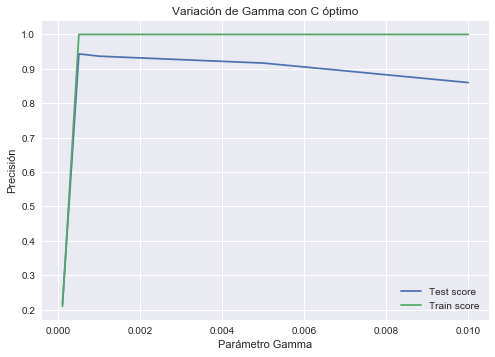

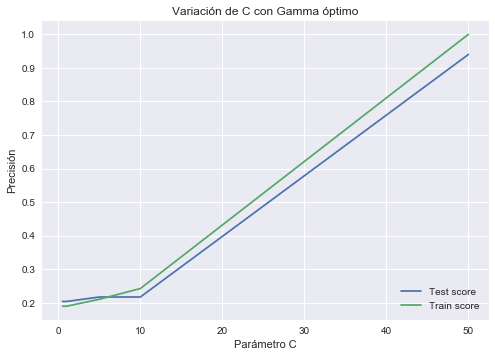

In [25]:
arr_gamma=grid.cv_results_['param_svc__gamma']
arr_C=grid.cv_results_['param_svc__C']

def get_best_index(ind,arr):
    w=[]
    l=list(arr)
    i=0
    try:
        C=l.index(ind)
        while (True):
            del(l[C])
            C=l.index(ind)
            w=np.append(C+i,w)
            i=i+1
    except:
        return(w)
def get_plot(ind,arr):
    w=[]
    for x in (ind):
        w=np.append(arr[int(x)],w)
    return(w)
    
iC=get_best_index(grid.best_params_['svc__C'],arr_C)
iGamma=get_best_index(grid.best_params_['svc__gamma'],arr_gamma)

#Graficar variaciones de C con Gamma estático
arr_C_variation_test=get_plot(iGamma,grid.cv_results_['mean_test_score'])
arr_C_variation_train=get_plot(iGamma,grid.cv_results_['mean_train_score'])
arr_C_variation_x=get_plot(iGamma,arr_C)

#Graficar variaciones de Gamma con C estático
arr_Gamma_variation_test=get_plot(iC,grid.cv_results_['mean_test_score'])
arr_Gamma_variation_train=get_plot(iC,grid.cv_results_['mean_train_score'])
arr_Gamma_variation_x=get_plot(iC,arr_gamma)

pylab.title('Variación de Gamma con C óptimo')
pylab.ylabel('Precisión')
pylab.xlabel('Parámetro Gamma')
pylab.plot(arr_Gamma_variation_x,arr_Gamma_variation_test,label='Test score')
pylab.plot(arr_Gamma_variation_x,arr_Gamma_variation_train,label='Train score')
pylab.legend(loc='lower right')
pylab.show()

pylab.title('Variación de C con Gamma óptimo')
pylab.ylabel('Precisión')
pylab.xlabel('Parámetro C')
pylab.plot(arr_C_variation_x,arr_C_variation_test, label='Test score')
pylab.plot(arr_C_variation_x,arr_C_variation_train, label='Train score')
pylab.legend(loc='lower right')
pylab.show()

## Predicciones

Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=150, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=True)), ('svc', SVC(C=5, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])


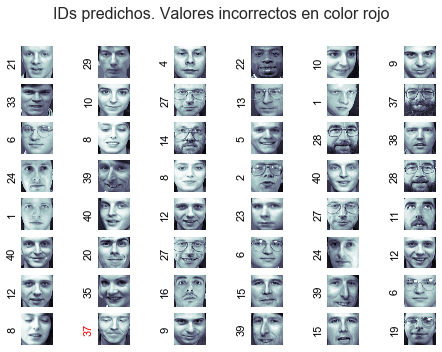

In [45]:
#Realizar predicciones
print(grid.best_estimator_)
model = grid.best_estimator_
yfit = model.predict(Xtest)
# Graficar algunas de las predicciones 
fig, ax = plt.subplots(8, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(64, 64), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(yfit[i]+1,
                   color='black' if yfit[i] == ytest[i] else 'red')

    fig.suptitle('IDs predichos. Valores incorrectos en color rojo', size=16);
plt.show()

## Reporte de Clasificación

In [46]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit)) 

             precision    recall  f1-score   support

          0       1.00      0.75      0.86         4
          1       1.00      1.00      1.00         2
          2       0.50      0.50      0.50         2
          3       1.00      1.00      1.00         4
          4       1.00      1.00      1.00         3
          5       1.00      1.00      1.00         3
          6       1.00      1.00      1.00         1
          7       1.00      0.86      0.92         7
          8       1.00      1.00      1.00         2
          9       1.00      1.00      1.00         3
         10       1.00      1.00      1.00         3
         11       1.00      1.00      1.00         4
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         1
         14       1.00      1.00      1.00         3
         15       0.67      1.00      0.80         2
         17       1.00      1.00      1.00         3
         18       1.00      1.00      1.00   

## Referencias

1. Vanderplas, Jacob T. Python Data Science Handbook: Tools and Techniques for Developers. O'Reilly, 2016.